# Stellar Core Collapse Signal GAN training

This demonstrates our training  process for a Generative Adversarial Network (GAN) to generate stellar core collapse signals. The GAN is trained on a dataset of 1764 stellar core collapse signals, each with 256 timestamps.



In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load training data

In [19]:
from staccato.training.training_data import TrainingData

training_data = TrainingData()
training_data.summary()

21-03-24 13:14:52|STACCATO|INFO| Signal Dataset mean: -0.516 +/- 39.724
Signal Dataset scaling factor (to match noise in generator): 5
Signal Dataset shape: (256, 1684)



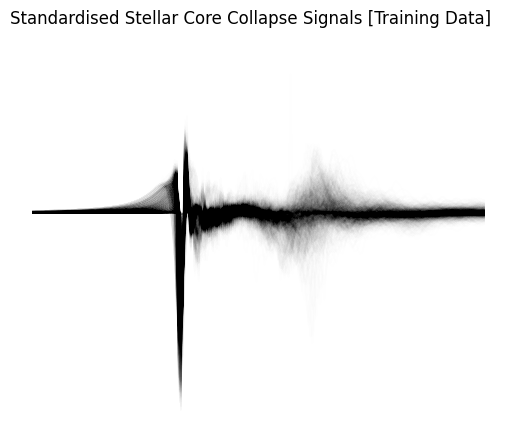

In [39]:
from staccato.plotting import overplot_signals

signals = training_data.standardize(training_data.raw_signals)[:, 130:-50]
fig = overplot_signals(signals, color="k", alpha=0.002)
fig.axes[0].set_axis_off()
fig.axes[0].grid(False)
_ = fig.suptitle("Standardised Stellar Core Collapse Signals [Training Data]")


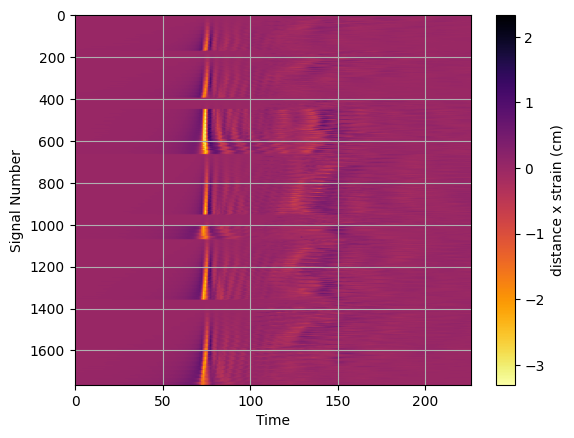

In [53]:
from staccato.plotting import plot_stacked_signals

fig = plot_stacked_signals(signals, norm='linear', cmap='inferno_r')

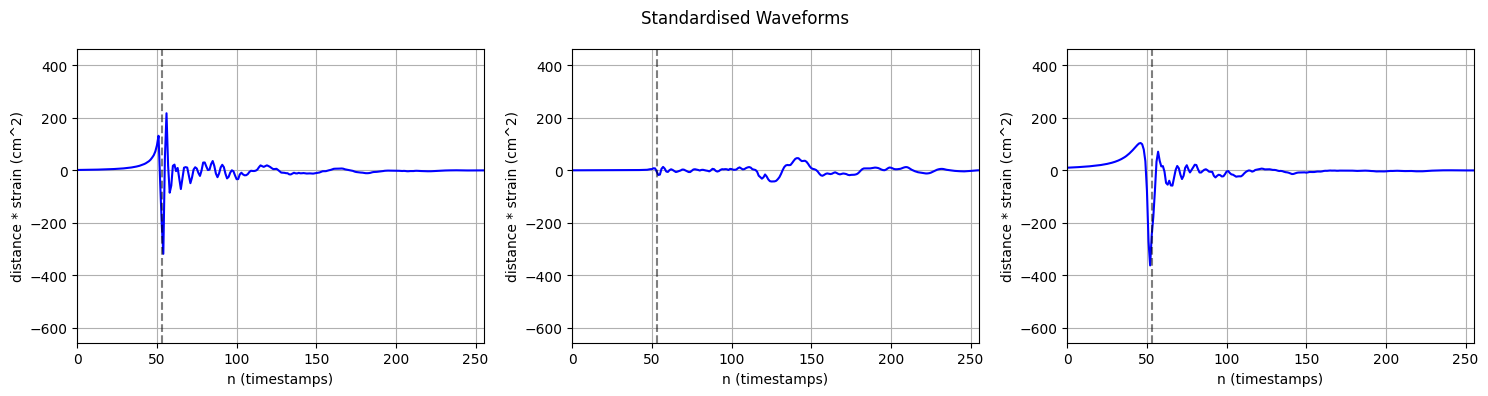

In [20]:
fig, axes = training_data.plot_waveforms(standardised=True)

### Train GAN and discriminator models

For details on the model, see the [model architecture](https://github.com/tarin-e/staccato/tree/main/src/staccato/nn).

For details on the training, see the [training code](https://github.com/tarin-e/staccato/blob/main/src/staccato/training/trainer.py).


/usr/local/lib/python3.11/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


21-03-24 13:31:45|STACCATO|INFO| Starting Training Loop [Epochs: 128, Train Size: (256, 1684), Learning Rate: (2e-05, 2e-05)]


Loss_D: %.4f, Loss_G: %.4f, Epochs::   0%|          | 0/128 [00:00<?, ?it/s]

Batch:   0%|          | 0/53 [00:00<?, ?it/s]

21-03-24 13:32:17|STACCATO|INFO| SGD Discriminator lr 0.0000200 -> 0.0000197
21-03-24 13:32:17|STACCATO|INFO| SGD Generator lr 0.0000200 -> 0.0000197


Batch:   0%|          | 0/53 [00:00<?, ?it/s]

KeyboardInterrupt: 

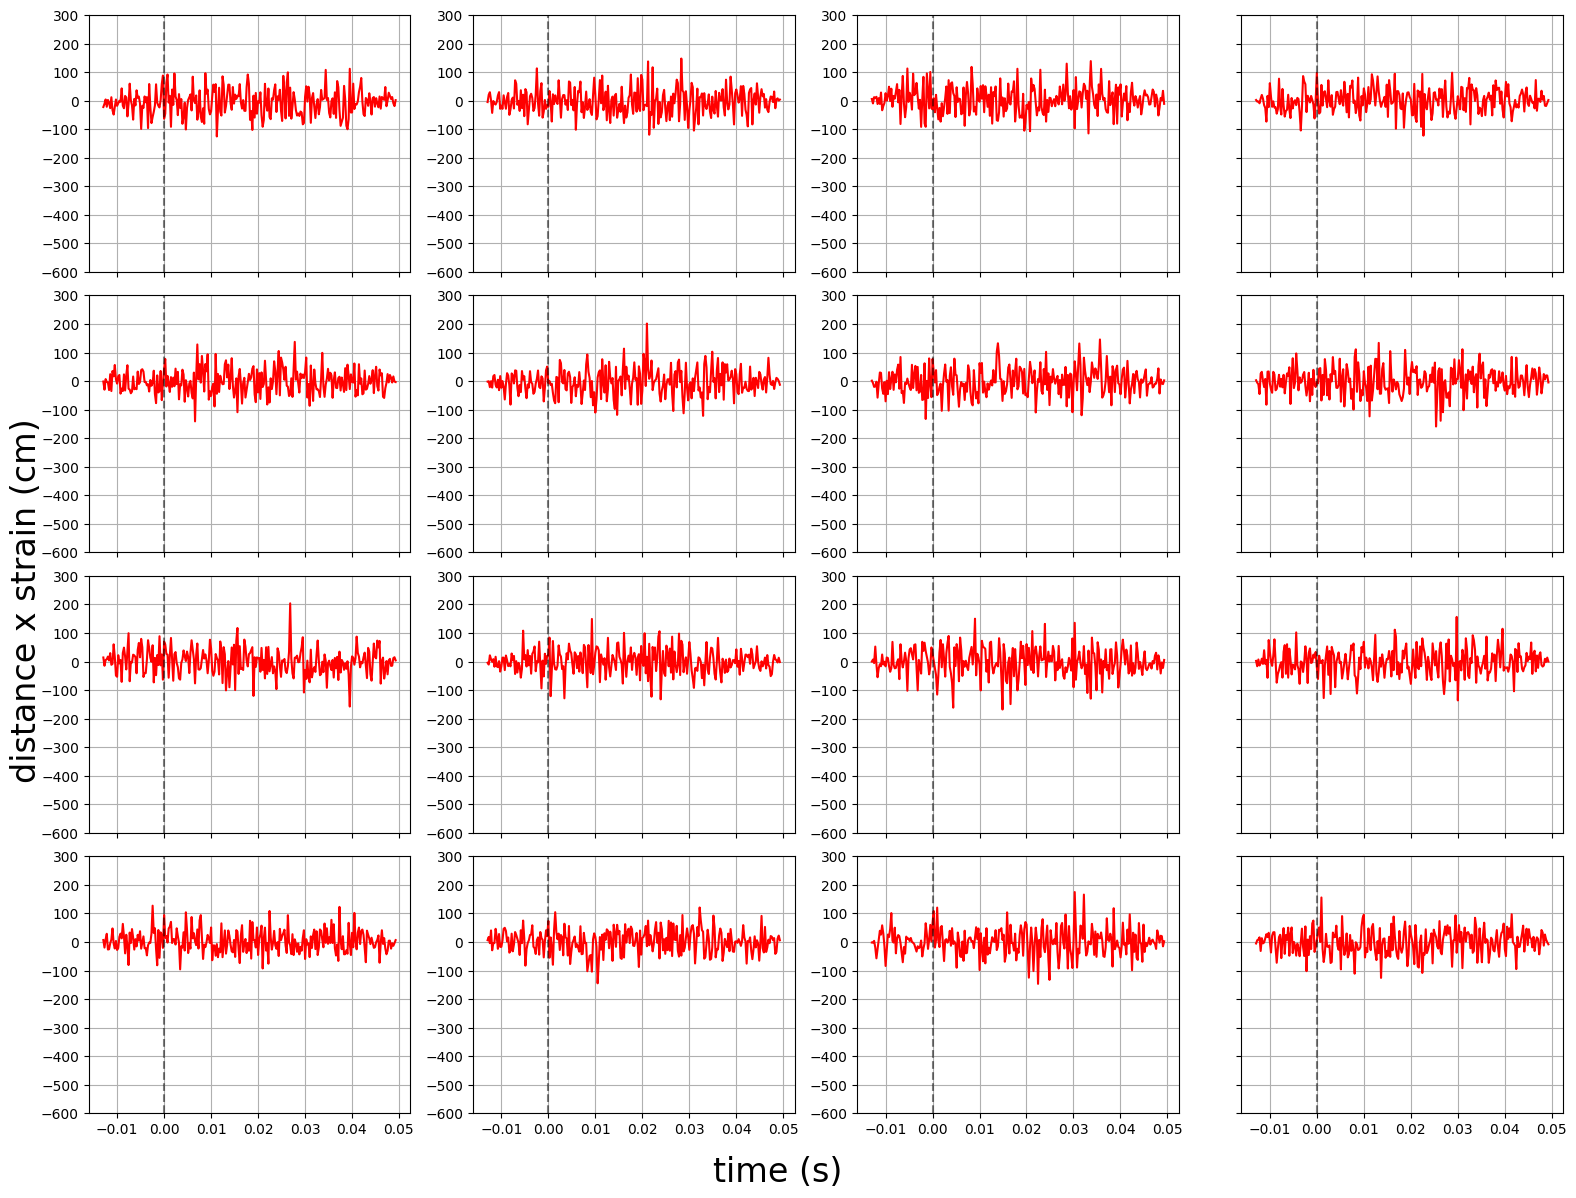

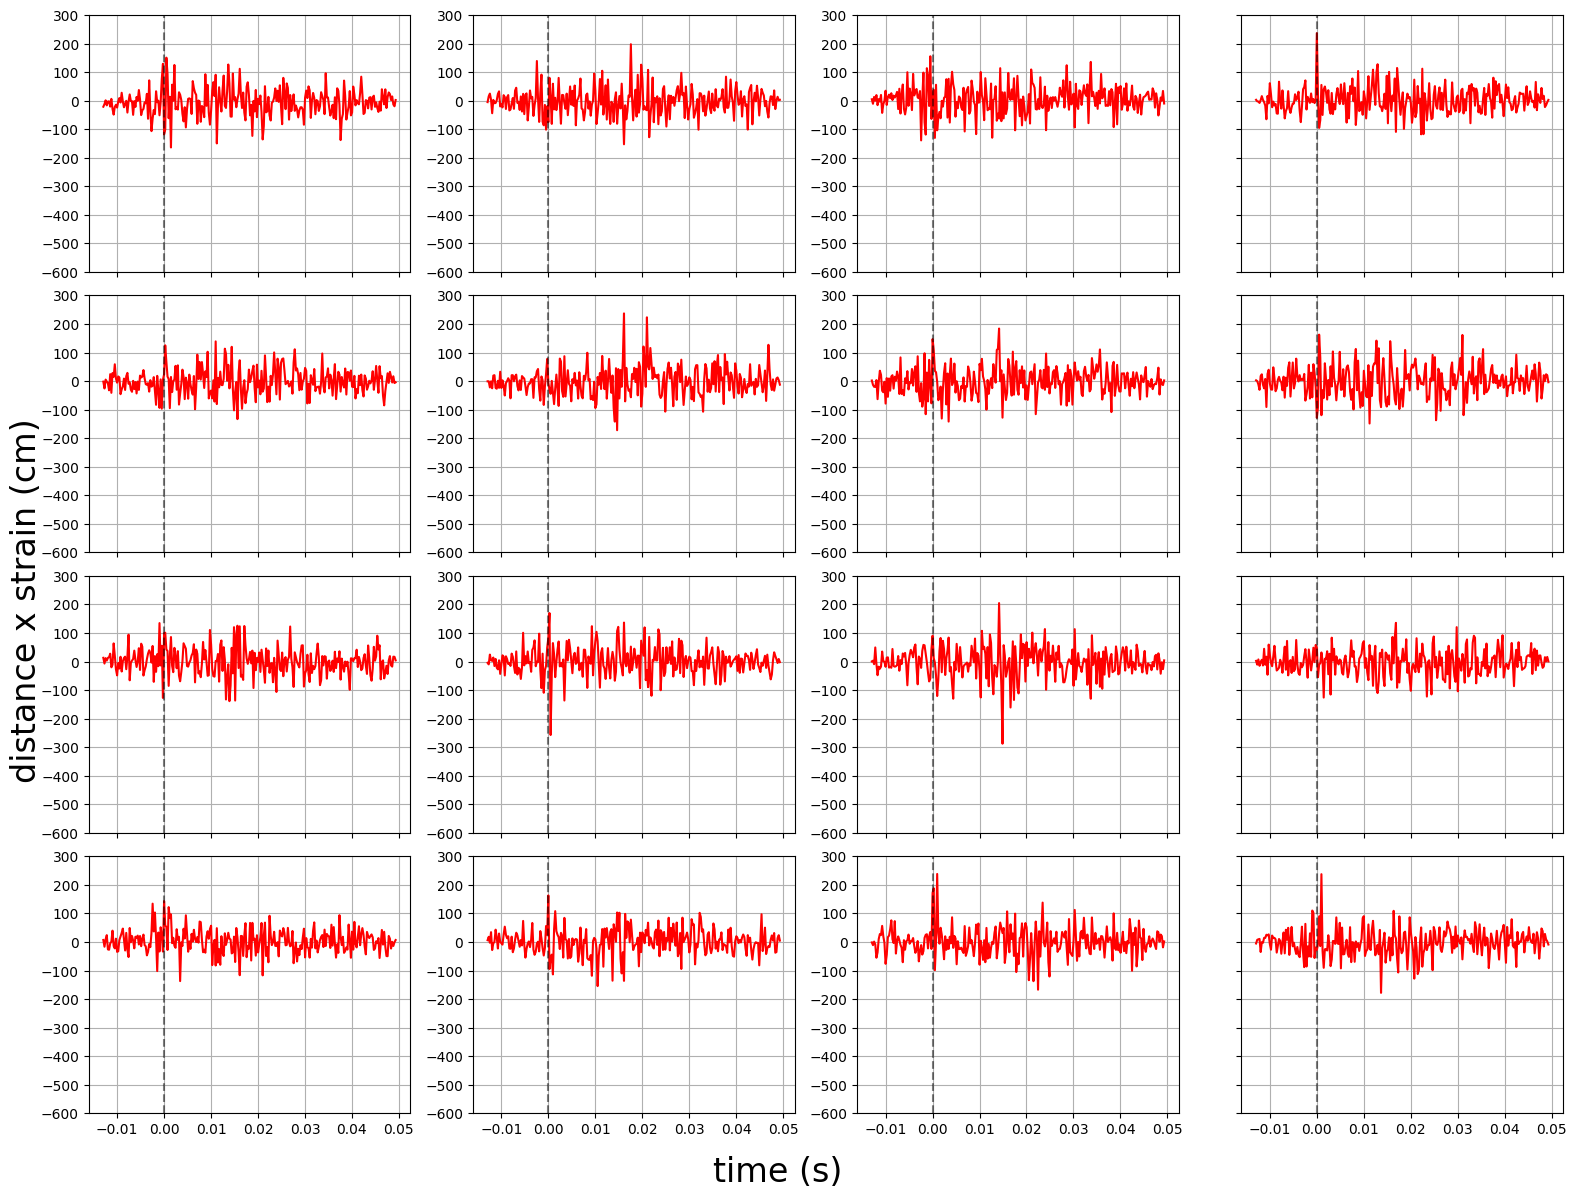

In [56]:
from staccato.training import train

result = train(num_epochs=128)

### Plots

#### Signals
![Signals][signals_end]

#### Training Loss plot
![Losses][losses]

#### Gradients
| Generator Gradients | Discriminator Gradients |
|---------------------|-------------------------|
| ![Generator Gradients][gen_grads] | ![Discriminator Gradients][disc_grads] |


[gen_grads]: outdir/generator_gradients.png
[disc_grads]: outdir/discriminator_gradients.png
[losses]: outdir/losses.png
[signals_end]: outdir/signals_epoch_128.png


